**Fraud Detection Analysis**

This is a study of fraud detection analysis from a DataSet that includes over than 6.3 millions of financial transaction

Key Columns
- Type: Transaxtion type (cash-in, cash-out, Transfer)
- AmountA amout of transaction 
- nameOrig / nameDest: Origin account and destiny accounts
- oldbalanceOrg / newbalanceOrig: Saldos antes y después de la transacción.
- isFraud: Binary label (1 = fraud, 0 = not fraud).

In [18]:
#Import the necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r'C:\Users\c93625b\OneDrive - EXPERIAN SERVICES CORP\Desktop\New folder\VM python\.venv\AIML Dataset.csv')
df.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [20]:
df.shape


(6362620, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [22]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [23]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [24]:
#Total Fraud rate 

total_amount = len(df)
total_frauds = df['isFraud'].sum()
total_fraud_rate = total_frauds / total_amount
print(f'The total fraud rate is: {total_fraud_rate:.4f} ({total_fraud_rate*100:.2f}%)')

The total fraud rate is: 0.0013 (0.13%)


In [25]:
# Total amount lost by Fraud

total_amount = df[df['isFraud']==1]['amount'].sum()

print(f'The total amout lost for Fraud is: ${total_amount: .3f}')


The total amout lost for Fraud is: $ 12056415427.840


In [26]:
# Average fraud amount 

avg_fraud_amount = df[df['isFraud']==1]['amount'].mean()
print (f'The average fraud amount is: ${avg_fraud_amount:.2f}')

The average fraud amount is: $1467967.30


isFraud
0    6354407
1       8213
Name: count, dtype: int64


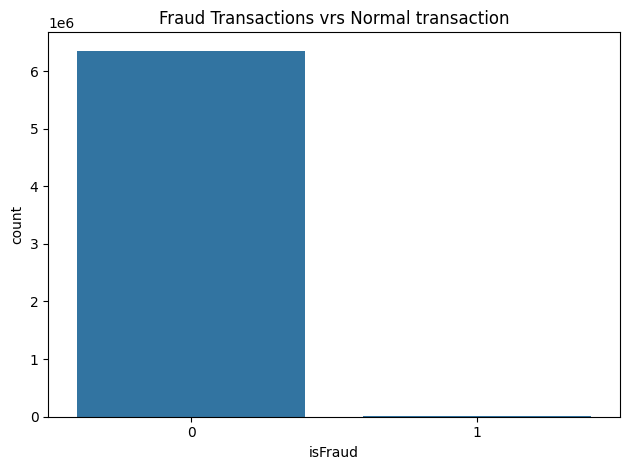

In [27]:
# Fraud Transactions vrs Normal transaction

print(df['isFraud'].value_counts())

sns.countplot(data = df, x = 'isFraud')
plt.title('Fraud Transactions vrs Normal transaction')
plt.tight_layout()
plt.show()


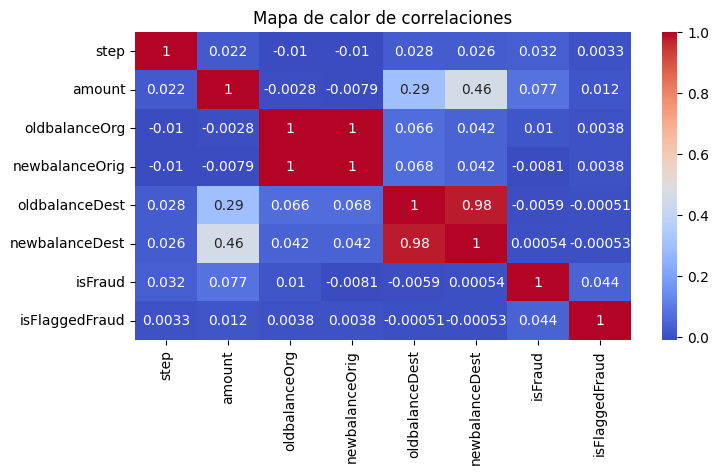

In [28]:
#correlations 

numeric_corr_df = df.select_dtypes(include = 'number')

corr = numeric_corr_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


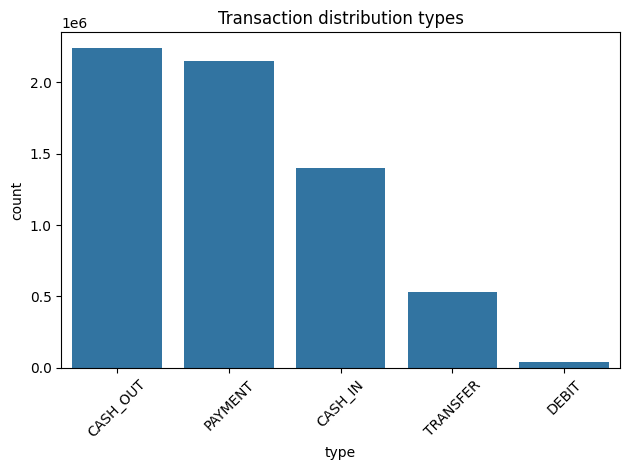

In [29]:
# Transaction distribution types

sns.countplot(data = df, x = "type", order=df['type'].value_counts().index)
plt.title ("Transaction distribution types")
plt.xticks (rotation = 45)
plt.tight_layout()
plt.show()

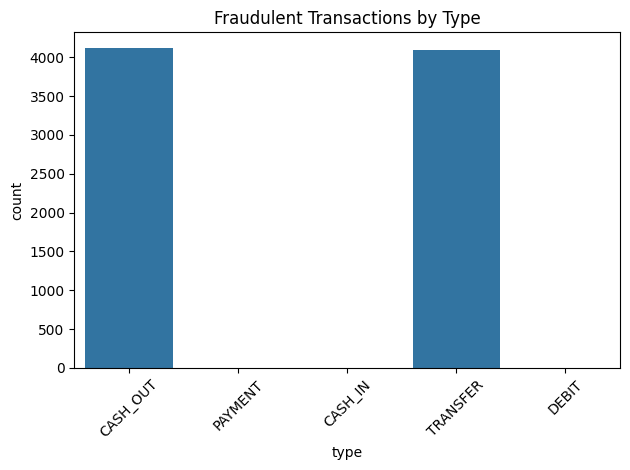

In [30]:
# "Fraudulent Transactions by Type

sns.countplot(data = df[df['isFraud'] == 1], x = 'type', order = df['type'].value_counts().index)
plt.title ("Fraudulent Transactions by Type")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

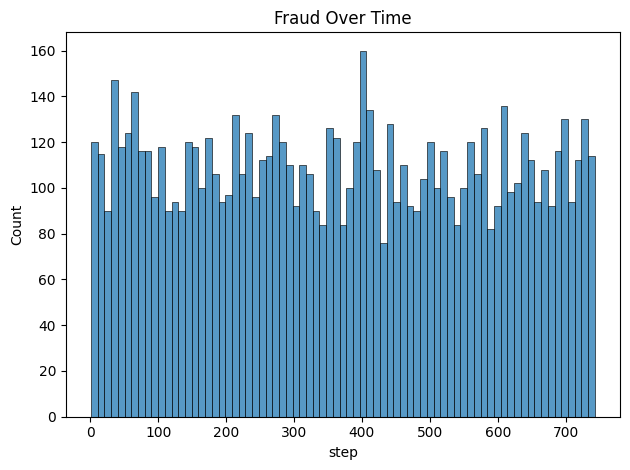

In [31]:
# Fraud Over Time 

sns.histplot(data = df[df['isFraud'] == 1], x ='step', bins=75)
plt.title('Fraud Over Time')
plt.tight_layout()
plt.show()

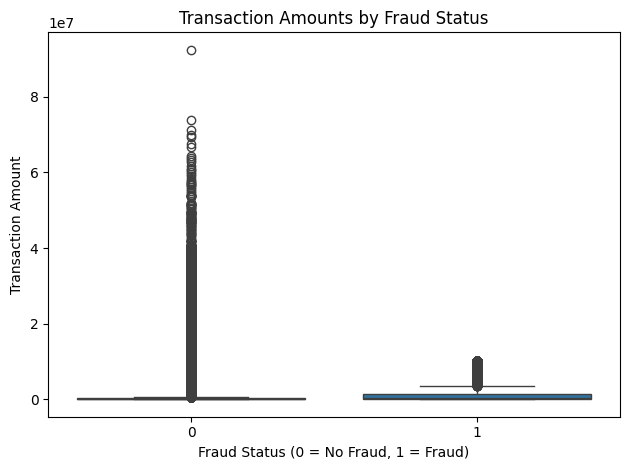

In [32]:
#Transaction Amounts by Fraud Status

sns.boxplot(data = df, x='isFraud', y='amount')
plt.title('Transaction Amounts by Fraud Status')
plt.tight_layout()
plt.xlabel("Fraud Status (0 = No Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

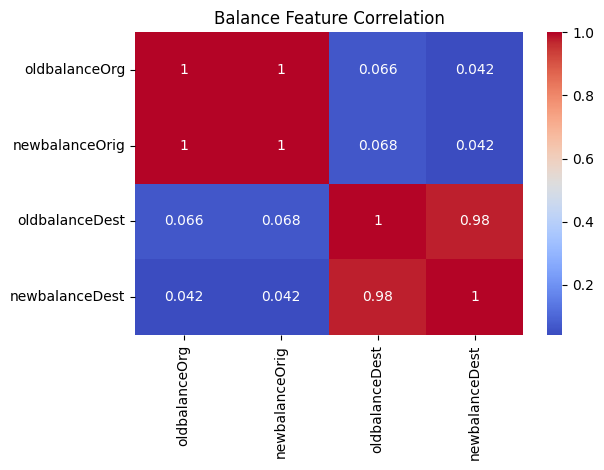

In [33]:
# Balance Feature Correlation

balance_features = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.heatmap(df[balance_features].corr(), annot=True, cmap = 'coolwarm')
plt.title('Balance Feature Correlation')
plt.tight_layout()
plt.show()

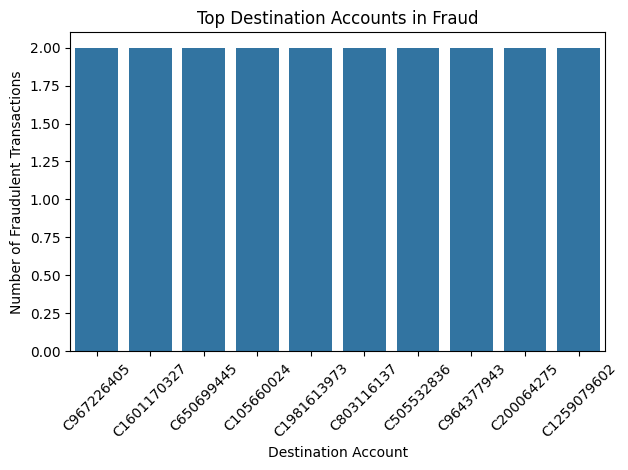

In [36]:
# Top Destination Accounts in Fraud

top_dest_accounts = df[df['isFraud'] == 1]['nameDest'].value_counts()
sns.barplot(x = top_dest_accounts.index[:10], y = top_dest_accounts.values[:10])
plt.title('Top Destination Accounts in Fraud')
plt.xlabel('Destination Account')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [37]:
fraud_dest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()
print(fraud_dest_counts[fraud_dest_counts > 2])

Series([], Name: count, dtype: int64)


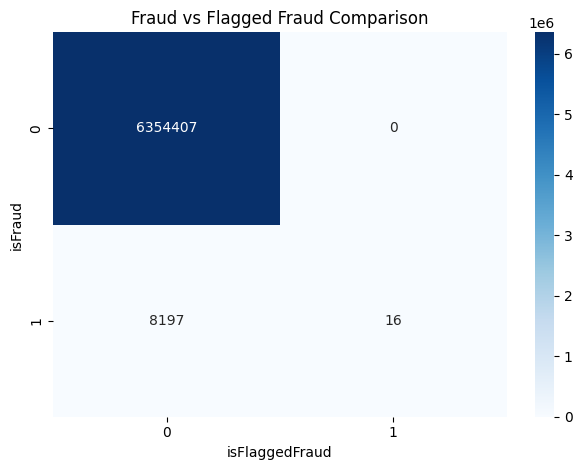

In [38]:
# Fraud vs Flagged Fraud Comparison
comparison = df.groupby(['isFraud', 'isFlaggedFraud']).size().unstack(fill_value=0)
sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues')
plt.title("Fraud vs Flagged Fraud Comparison")
plt.tight_layout()
plt.show()


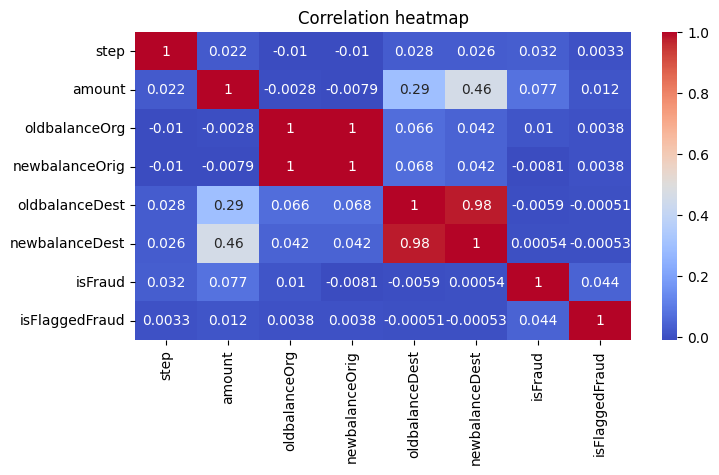

In [39]:
#correlations 

numeric_corr_df = df.select_dtypes(include = 'number')

corr = numeric_corr_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()


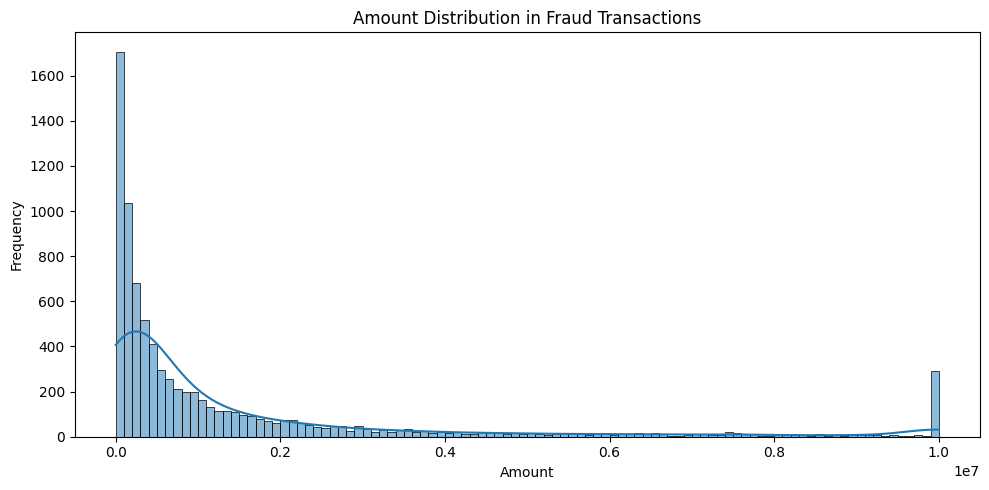

In [40]:
fraud_df = df[df['isFraud'] == 1]
plt.figure(figsize=(10, 5))
sns.histplot(fraud_df['amount'], bins=100, kde=True)
plt.title("Amount Distribution in Fraud Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Linear regresion in Fraud analysis 

In [41]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) 


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
prediction = model.predict(X_test)

In [43]:
r2 = r2_score(y_test, prediction)
print(f'R2: {r2:.2f}')

R2: 0.14


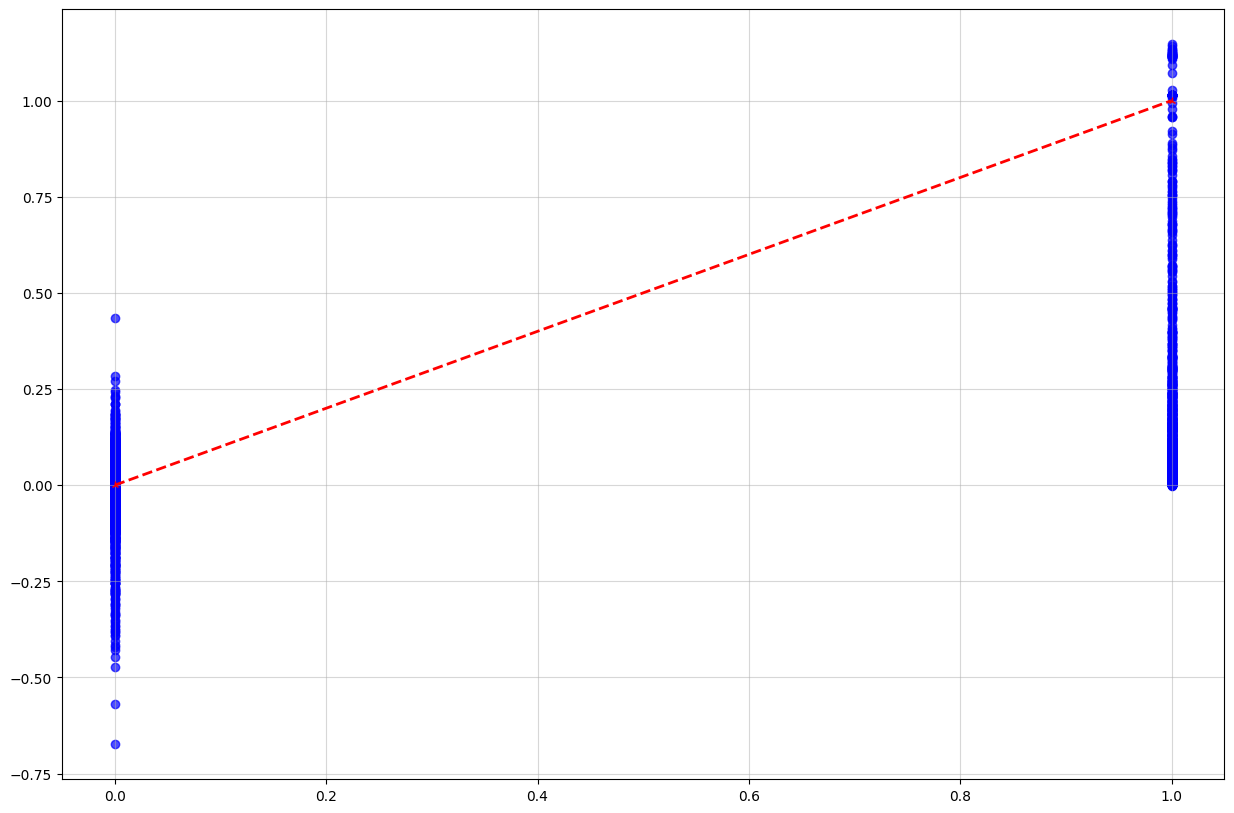

In [44]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, prediction, alpha = 0.7, color = 'blue')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--2', lw = 2
)

plt.grid(True, alpha = 0.5)
plt.show()

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = df[features]

y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[1906189     162]
 [   1317    1118]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.87      0.46      0.60      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.73      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [46]:
#cross validation 


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("F1 promedio:", scores.mean())


F1 promedio: 0.5822128549227659


In [48]:
#Random Forest

# 📦 Importación de librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = df[features]

y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 🧠 Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predicciones
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 🧾 Evaluación
print("🔍 Random Forest")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

🔍 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.72      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.86      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC-AUC: 0.9882
